In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/categories_general.xlsx", index_col=0)
df_race = pd.read_excel("/content/categories_race.xlsx", index_col=0, header=[0, 1])

In [ ]:
df_race.columns = df_race.columns.map("-".join)
df_race = df_race.drop(["All punctuation"])

In [ ]:
# Each attribute we'll plot in the radar chart.
labels = df.index.tolist()

In [ ]:
def hex_to_rgba(hex, alpha=1.0):
    hex = hex.lstrip('#')
    lv = len(hex)
    return tuple(int(hex[i:i + lv // 3], 16) / 255. for i in range(0, lv, lv // 3)) + (alpha,)

def draw_gradient_circle(ax, radius, color_start_hex, color_end_hex, num_gradations=10):
    color_start = hex_to_rgba(color_start_hex, 1)
    color_end = hex_to_rgba(color_end_hex, 1)
    for i in range(num_gradations):
        # Calculate the current color in the gradient
        current_color = np.array(color_start) * (1 - i / num_gradations) + np.array(color_end) * (i / num_gradations)
        # Draw a circle with the current color
        circle = plt.Circle((0, 0), radius * (i + 1) / num_gradations, transform=ax.transData._b, color=current_color, fill=False)
        ax.add_artist(circle)


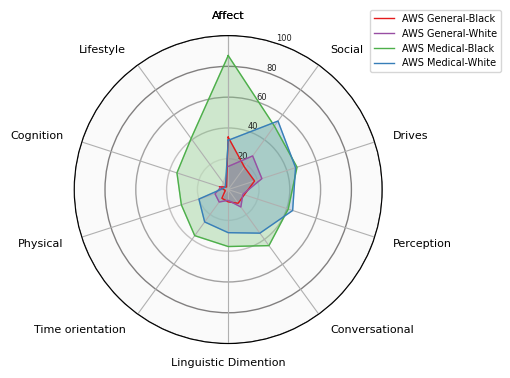

In [ ]:
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

draw_gradient_circle(ax, 100, "#e6e3e3", "#3d3d3d", 5)  # Gradient from red to transparent yellow

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color, df):
  values = df[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
# add_to_radar('AWS General', '#e41a1c', df)
# add_to_radar('AWS Medical', '#377eb8', df)
add_to_radar('AWS General-Black', '#e41a1c', df_race)
add_to_radar('AWS General-White', '#984ea3', df_race)
add_to_radar('AWS Medical-Black', '#4daf4a', df_race)
add_to_radar('AWS Medical-White', '#377eb8', df_race)
# add_to_radar('Whisper', '#d42cea', df_race)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels + labels[:1])

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([-20, 0, 20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Customize the plot (repeat your styling here without setting a fixed color for gridlines)
ax.tick_params(colors='#222222', axis='y', labelsize=6)
ax.set_facecolor('#FAFAFA')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), prop={"size": 7})
ax.yaxis.grid(False)
ax.tick_params(axis='x', labelsize=8)

# Remove the outer circle (spine)
# ax.spines['polar'].set_visible(False)

# # Change the color of the circular gridlines.
# ax.grid(color='#AAAAAA')

In [ ]:
fig.savefig("radar_race.png", bbox_inches='tight', dpi=600)

# LIWC Results

In [ ]:
df = pd.read_excel("liwc_results.xlsx", index_col=0, header=[0, 1])

In [ ]:
df

AWS GT       AWS Medical        \
race                             Black White       Black White   
posemo (Affect)                     60     5         133    17   
risk (Drives)                       29    43          21   114   
certain (Cognition)                 33     4          78    15   
Tone (Affect)                       33    17          85    37   
interrog (Linguistic Dimention)     29     4          62    27   
nonflu (Conversational)             23    53          79   104   
adverb (Linguistic Dimention)       21    12          56    29   
negemo (Affect)                     14    11          45    17   
auxverb (Linguistic Dimention)       5     9          42    21   
adj (Linguistic Dimention)           2     4          30     8   
focuspast (Time orientation)         3    10          32    15   
verb (Linguistic Dimention)          9     9          44    25   
article (Linguistic Dimention)       7    15          39    29   
conj (Linguistic Dimention)         20    20          45    61   
focuspresent (Time orientation)      7     9          43    30   
function (Linguistic Dimention)      9    11          40    27   
cogproc (Cognition)                  8    11          41    30   
pronoun (Linguistic Dimention)       7    12          34    27   
informal (Conversational)            1     9          39    36   
social (Social)                     24    29          61    56   
drives (Drives)                     18    22          46    45   
cause (Cognition)                   17    20          47    47   
negate (Linguistic Dimention)      -10   -16          19    20   
focusfuture (Time orientation)     -11     3          10     8   
i (Linguistic Dimention)            -7     4          11     5   
Sixltr (Linguistic Dimention)       -7    -2          19     2   
discrep (Cognition)                -16    14          25    25   
feel (Perception)                   -7    16          34    43   

                                            AWS GT        AWS Medical  
race                            Unnamed: 5_level_1 Unnamed: 6_level_1  
posemo (Affect)                                 26                 62  
risk (Drives)                                   36                 68  
certain (Cognition)                             18                 44  
Tone (Affect)                                   25                 61  
interrog (Linguistic Dimention)                 16                 44  
nonflu (Conversational)                         35                 89  
adverb (Linguistic Dimention)                   16                 43  
negemo (Affect)                                 12                 29  
auxverb (Linguistic Dimention)                   7                 32  
adj (Linguistic Dimention)                       3                 19  
focuspast (Time orientation)                     6                 24  
verb (Linguistic Dimention)                      9                 35  
article (Linguistic Dimention)                  11                 34  
conj (Linguistic Dimention)                     20                 51  
focuspresent (Time orientation)                  8                 37  
function (Linguistic Dimention)                 10                 34  
cogproc (Cognition)                             10                 35  
pronoun (Linguistic Dimention)                   9                 31  
informal (Conversational)                        5                 37  
social (Social)                                 26                 59  
drives (Drives)                                 20                 46  
cause (Cognition)                               19                 47  
negate (Linguistic Dimention)                  -13                 19  
focusfuture (Time orientation)                  -5                  9  
i (Linguistic Dimention)                        -2                  8  
Sixltr (Linguistic Dimention)                   -5                 11  
discrep (Cognition)                

In [ ]:
(df).style.background_gradient(cmap ='coolwarm', axis=None).set_properties(**{'font-size': '12px'}).to_excel('liwc_results.xlsx', engine='openpyxl')